In [3]:
def irange(*args):
    """
    An inclusive version of range.
    Can be used with 1, 2, or 3 arguments.
    """
    if len(args) == 0:
        raise TypeError("inclusive_range expected at least 1 argument, got 0")
    elif len(args) == 1:
        start, stop, step = 0, args[0], 1
    elif len(args) == 2:
        start, stop, step = args[0], args[1], 1
    elif len(args) == 3:
        start, stop, step = args
    else:
        raise TypeError(f"inclusive_range expected at most 3 arguments, got {len(args)}")
    
    # Modify stop value to make it inclusive
    if step > 0:
        stop += 1
    else:
        stop -= 1

    return range(start, stop, step)

def swap_elements(lst, index1, index2):
    """
    Swap elements in the list at the given indices.

    Args:
    - lst (list): The list of elements.
    - index1 (int): The index of the first element to swap.
    - index2 (int): The index of the second element to swap.

    Returns:
    - list: The list with swapped elements.
    """
    if index1 < 0 or index1 >= len(lst) or index2 < 0 or index2 >= len(lst):
        raise ValueError("Index out of range")

    lst[index1], lst[index2] = lst[index2], lst[index1]
    return lst


import networkx as nx
import matplotlib.pyplot as plt

# Python function to draw a KMP automaton based on a given FAIL vector and pattern

import matplotlib.pyplot as plt
import networkx as nx

def draw_kmp_automaton(fail, pattern):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for each state including the final state and the special "?" state
    G.add_nodes_from(range(len(fail) + 1))
    G.add_node('?')

    # Add forward edges based on the given pattern
    for i, char in enumerate(pattern):
        G.add_edge(i, i + 1, label=char)

    # Add the final state with a double-line border and green background
    G.nodes[len(fail)]['style'] = 'filled,double'
    G.nodes[len(fail)]['fillcolor'] = 'lightgreen'

    # Add backward edges based on the FAIL vector
    for i, f in enumerate(fail):
        if f != -1:
            # Use arcs to avoid overlap of backward edges
            if i == 2:
                # From state 2 to 0 (underneath)
                rad = -0.5
            elif i == 3:
                # From state 3 to 1 (over the top)
                rad = 0.7
            elif i == 4:
                # From state 4 to 2 (underneath)
                rad = -0.7
            else:
                # Alternate the rest for clarity
                rad = 0.3 if i % 2 == 0 else -0.3
            G.add_edge(i, f, connectionstyle=f'arc3,rad={rad}')
        else:
            # Add an edge for FAIL[i] == -1 leading to the "?" state
            G.add_edge(i, '?', connectionstyle='arc3,rad=-0.5')

    # Specify the layout of the nodes
    pos = {i: (i, 0) for i in range(len(fail) + 1)}
    pos['?'] = (-1, 0)  # Place the "?" state to the left

    # Create the plot
    plt.figure(figsize=(15, 5))

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue', edgecolors='black', linewidths=1)
    nx.draw_networkx_nodes(G, pos, nodelist=['?'], node_size=700, node_color='white', edgecolors='gray')
    nx.draw_networkx_nodes(G, pos, nodelist=[len(fail)], node_size=700, node_color='lightgreen', edgecolors='black', linewidths=2)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, d in G.edges(data=True) if 'label' in d],
                           arrowstyle='->', arrowsize=15, edge_color='black')
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, d in G.edges(data=True) if 'label' not in d],
                           connectionstyle='arc3,rad=0.3', arrowstyle='->', arrowsize=15, edge_color='red', style='dashed')

    # Draw the labels for the nodes and forward edges
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True) if 'label' in d}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Turn off the axis
    plt.axis('off')

    # Show the plot
    plt.show()



# Naivní (Brute Force) algoritmus
(V textu **t** hledá vzorek **p**)

In [4]:
def Match (t, p, tl, pl):
    auxStartT = 0
    posT = 0
    posP = 0
    
    while posT < tl and posP < pl:
        if t[posT] == p[posP]:
            posT = posT + 1               ;print(f"Match {t[posT-1]} at position {posT-1}")
            posP = posP + 1
        else:
            auxStartT = auxStartT + 1     ;print(f"NO MATCH {t[posT]} != {p[posP]}")
            posT = auxStartT
            posP = 0
            
    if posP == pl:
        return auxStartT     # Nasli jsme
    else:
        return posT          # Nenasli jsme


In [5]:
text = "Ahoj, kam kracis? Ahoj, kamo, jak je?"
ptrn = "kamo"

text_len = len(text)
ptrn_len = len(ptrn)

result = Match(text, ptrn, text_len, ptrn_len)

if (result == text_len):
    print("NOT FOUND!")
else:
    print(f"PATTERN {ptrn} FOUND at position {result}\n")


NO MATCH A != k
NO MATCH h != k
NO MATCH o != k
NO MATCH j != k
NO MATCH , != k
NO MATCH   != k
Match k at position 6
Match a at position 7
Match m at position 8
NO MATCH   != o
NO MATCH a != k
NO MATCH m != k
NO MATCH   != k
Match k at position 10
NO MATCH r != a
NO MATCH r != k
NO MATCH a != k
NO MATCH c != k
NO MATCH i != k
NO MATCH s != k
NO MATCH ? != k
NO MATCH   != k
NO MATCH A != k
NO MATCH h != k
NO MATCH o != k
NO MATCH j != k
NO MATCH , != k
NO MATCH   != k
Match k at position 24
Match a at position 25
Match m at position 26
Match o at position 27
PATTERN kamo FOUND at position 24



### Zhodnocení

* Časová složitost:
  * Nejlepší případ: **pl** porovnání - vzorek je hned na začátku textu.
  * Nejhorší případ: **O(mn)** porovnání - Na každé pozici dojde k (pl-1) shodám, např.:
    * P = 'AAA...AB'
    * T = 'AAA...AAA'
  * **tl** porovnání, pokud symbol p[0] v textu vůbec není.
  * Největší problém - **návraty v textu**.

# KMP

In [6]:
def KMPFindFail (p, pl, fail):
    fail[0] = -1
    for k in irange(1, pl-1):
        r = fail[k-1]
        while (r >= 0) and (p[r] != p[k-1]):
            r = fail[r]
        fail[k] = r + 1

[-1, 0, 0, 1, 2]


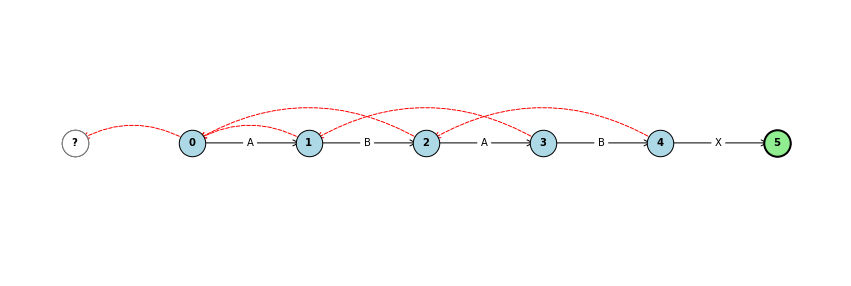

In [12]:
p = "ABABABCB"
p = "ABABCB"
p = "ABABX"
#p = "ABABAB"
#p = "KOKOS"
pl = len(p)
fail = [-2] * pl

KMPFindFail(p, pl, fail)

print(fail)
draw_kmp_automaton(fail, p)

In [8]:
def KMPMatch (t, p, tl, pl, fail):
    posT = 0
    posP = 0
    
    while (posT < tl and posP < pl):
        if posP < 0:
            # Zadna shoda, posun v textu o 1 dopredu
            posP = 0                          ;print(f"POSUN: {t[posT]} -> {t[posT+1]}")
            posT = posT+1
        else:
            if (t[posT] == p[posP]):
                 # Shoda, posun v textu i vzorku
                posT = posT + 1               ;print(f"SHODA: {p[posP]}")
                posP = posP + 1
            else:
                pass                          ;print(f"FAIL: {t[posT]} != {p[posP]}", end="")
                # Neshoda, nasleduji zpetnou hranu
                posP = fail[posP]             
                
                if posP == -1:
                    print(f", FAIL je -1, VYZADOVAN NOVY SYMBOL")
                else:
                    print(f", FAIL je {posP}, NAVRAT NA {p[posP]}")
    
    if posP == pl:
        # Nalezeno, vraci prvni pozici vyskytu vzorku
        return posT - pl
    else:
        # Nenalezeno, vraci hodnotu TL + 1
        return posT
                

[-1, 0, 0, 1, 2]


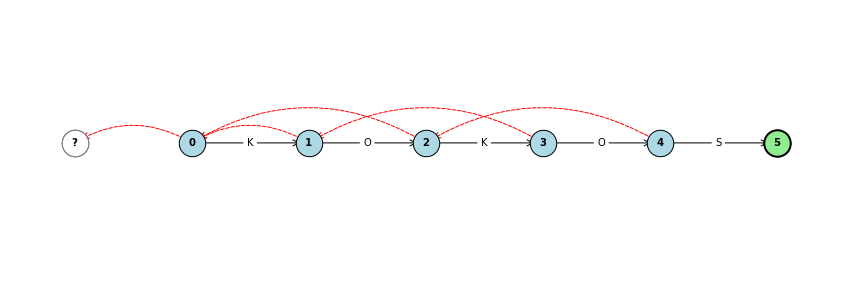

CLANEKOKOKOSU
KOKOS
FAIL: C != K, FAIL je -1, VYZADOVAN NOVY SYMBOL
POSUN: C -> L
FAIL: L != K, FAIL je -1, VYZADOVAN NOVY SYMBOL
POSUN: L -> A
FAIL: A != K, FAIL je -1, VYZADOVAN NOVY SYMBOL
POSUN: A -> N
FAIL: N != K, FAIL je -1, VYZADOVAN NOVY SYMBOL
POSUN: N -> E
FAIL: E != K, FAIL je -1, VYZADOVAN NOVY SYMBOL
POSUN: E -> K
SHODA: K
SHODA: O
SHODA: K
SHODA: O
FAIL: K != S, FAIL je 2, NAVRAT NA K
SHODA: K
SHODA: O
SHODA: S
VZOREK KOKOS NALEZEN na pozici 7



In [126]:
#t = "CCABACABABCAABABABCBC"
#p = "ABABABCB"

t = "CLANEKOKOKOSU"
p = "KOKOS"

tl = len(t)
pl = len(p)

# Create Fail Vector
fail = [-2] * pl
KMPFindFail(p, pl, fail)
print(fail)
draw_kmp_automaton(fail, p)


print(t)
print(p)
print("=============")

# KMP Match
result = KMPMatch(t, p, tl, pl, fail)
if (result >= tl):
    print("VZOREK NEBYL NALEZEN!")
else:
    print(f"VZOREK {p} NALEZEN na pozici {result}\n")


### KMP - zhodnocení
* Sestavení vektoru FAIL vyžaduje **2m-3** porovnání. Časová složitost je **lineární**: O(m)
* Vyhledávání - **maximálně 2n** porovnání -> **Lineární** O(n)
* Celkově lineární: **O(n+m)**
* KMP **nejde v textu zpět**.
* Empirické studie ukazují, že v běžných (přirozených) jazycích je **zrhuba stejný počet porovnání** jako u naivního algoritmu. Proč?
  * Případy, kde naivní algoritmus je tak špatný (jako v ukázce nahoře), jsou velmi málo časté.
  * Častějí spíše zjistíme, že na dané pozici v textu se text nemůže nikdy nacházet a jdeme dál...

### Můžeme vyhledávat ještě rychleji?
* **Společné vlastnosti naivního algoritmu a KMP:**
    * **Každý symbol textu** musí být porovnán **alespoň jednou**.
        * Je to dáno tím, že vzorek porovnáváme zleva doprava
        * I když není shoda, posuneme se o 1 znak a znovu porovnáváme
        * Musíme tedy porovnávat každý vzorek
* **Lze vyhledávat rychleji?**
    * Ano, 

# Boyer-Mooreův algoritmus
* Snaží se o **větší skoky v textu.**
* Vzorky přikládáme k textu klasicky **zleva doprava**.
* Jakmile je vzorek přiložen, symboly porovnáváme **zprava doleva**.
    * Díky tomu nemusí být některé symboly v textu vůbec porovnávány (lze je přeskočit).
* Čím delší je vzorek, tím větší počet znaků je možné přeskočit.

## 1. Heuristika (Bad Character Rule)
Pokud zjistíme, že:
* Máme neshodu - v textu je **jiný symbol** než ve vzorku.
* A zároveň tento symbol **ve vzorku vůbec není**.

Pak další přiložení dává smysl až **za pozicí tohoto symbolu**. (Nemusíme nic předtím v textu porovnávat)

NESHODA - o kolik mohu v textu skočit (o kolik pozic posunout vzorek)?
* Symbol se ve vzorku vůbec nenachází - o celkou o délku vzorku **m**
* Symbol se ve vzorku nachází a jeho nejpravější výskyt je pozici **k**, pak mohu skočit o **m-1-k** pozic

In [34]:
def ComputeJumps (p):
    CharJump = dict()
    alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    for i in irange(0, len(alphabet)-1):
        ch = alphabet[i]
        CharJump[ch] = len(p)
    
    for k in irange(0, len(p)-1):
        CharJump[p[k]] = len(p) - 1 - k
        
    return CharJump

In [127]:
CharJump = dict()
p = "KOKOS"
#p = "DABCABCDCB"
#p = "BABABCDD"

CharJump = ComputeJumps(p)
print(CharJump)



{'A': 5, 'B': 5, 'C': 5, 'D': 5, 'E': 5, 'F': 5, 'G': 5, 'H': 5, 'I': 5, 'J': 5, 'K': 2, 'L': 5, 'M': 5, 'N': 5, 'O': 1, 'P': 5, 'Q': 5, 'R': 5, 'S': 0, 'T': 5, 'U': 5, 'V': 5, 'W': 5, 'X': 5, 'Y': 5, 'Z': 5}


## 2. Heuristika (Good Suffix Rule)

In [116]:
def ComputeMatchJump(p):
    m = len(p)
    MatchJump = [m] * m
    last_prefix_position = m

    for i in range(m - 1, -1, -1):
        if is_prefix(p, i + 1):
            last_prefix_position = i + 1
        MatchJump[i] = last_prefix_position - i + m - 1

    for i in range(m - 1):
        slen = suffix_length(p, i)
        MatchJump[m - 1 - slen] = m - 1 - i + slen

    return MatchJump

def is_prefix(p, p_index):
    m = len(p)
    for i in range(p_index, m):
        if p[i] != p[i - p_index]:
            return False
    return True

def suffix_length(p, p_index):
    length = 0
    m = len(p)
    for i in range(p_index, -1, -1):
        if p[i] == p[m - 1 - length]:
            length += 1
        else:
            break
    return length

p = "KOKOS"
p = "ABAABA"
p = "BATSANDCATS"

MJ = CMJ (p)
print(MJ)

[21, 20, 19, 18, 17, 16, 15, 10, 13, 12, 1]


In [117]:
def BMA(p, t):
    CharJump = ComputeJumps(p)                            ; print(f"TEXT: {t}")
    MatchJump = ComputeMatchJump(p)
    
    posT = len(p) - 1                                     ; ps = 0 ; print(f"PTRN: {p}")
    posP = len(p) - 1
    
    while posT < len(t) and posP >= 0:
        if t[posT] == p[posP]:
            posT = posT - 1
            posP = posP - 1
        else:
            posT = posT + max(CharJump[t[posT]], MatchJump[posP])      
            #posT = posT + CharJump[t[posT]]
            posP = len(p) - 1                 
            
            pass                                   ; ps = posT - len(p) + 1
            pass                                  ;print("PTRN: ", end=""); print(ps * " ", end="");print(f"{p}"); 
    
    if posP < 0:
        return posT + 1
    else:

        return len(t) # +1?

In [129]:
t = "CLANEKOKOKOSU"
p = "KOKOS"

t = "BABABADDBABABCDD"
p = "BABABCDD"

tl = len(t)
pl = len(p)


print(t)
print(p)
print("=============")

# KMP Match
result = BMA(p, t)
if (result >= tl):
    print("VZOREK NEBYL NALEZEN!")
else:
    print(f"VZOREK {p} NALEZEN na pozici {result}\n")


CLANEKOKOKOSU
KOKOS
TEXT: CLANEKOKOKOSU
PTRN: KOKOS
PTRN:      KOKOS
PTRN:        KOKOS
VZOREK KOKOS NALEZEN na pozici 7



In [103]:
## TODO FIX in the future
## Attempt to recreate the original version of ComputeMatchJump from IAL materials
## Fixed to index from 0, but still not working properly

def BROKEN_ComputeMatchJump(P, MatchJump):
    backup = [0] * len(P)
    m = len(P)
    
    for k in irange(0, m-1):                          # orig 1..m
        MatchJump[k] = 2 * m - k - 1                  # orig 2m-k
    
    k = m - 1                                         # orig: m
    q = m                                             # orig: m+1
    
    while k >= 0:                                     # orig: k>0
        backup[k] = q
        while (q < m - 1) and P[k] != P[q]:           # orig: while (q < m) and P[k] != P[q]
            MatchJump[q] = min(MatchJump[q], m-k-1)   # orig: m-k
            q = backup[q]
        k = k-1
        q = q-1
        
    for k in irange(0, q-1):                          # orig: 1..q
        MatchJump[k] = min(MatchJump[k], m+q-k-1)     # orig: m+q-k
        
    qq = backup[q]
    
    while q < (m - 1):                                 # orig: q<m
        while q < qq:
            MatchJump[q] = min(MatchJump[q], qq-q+m-1) # orig: qq-q+m
            q = q + 1
        q = backup[qq]

p = "ABAABA"
MatchJump = [-1] * len(p)

ComputeMatchJump(p, MatchJump)
print(MatchJump)


TypeError: ComputeMatchJump() takes 1 positional argument but 2 were given